In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')


<h1 style="text-align:center;">Unveiling the Numerical Patterns: Exploring the Frequency Distribution of Numbers in Simulated 6/55 Lotto Games</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #prob_stat
- [Problem Statement][ref0]

[ref1]: #dat_prep
- [Data Preprocessing][ref1]

[ref2]: #dat_expl
- [Data Exploration][ref2]

[ref4]: #conc
- [Conclusion and Recommendations][ref4]

***

<a name="prob_stat"></a>
## Problem Statement
***

This study aims unveil hidden patterns in number frequencies, to dismiss any discernible trends or anomalies by employing sophisticated statistical techniques such as SARIMAX and ARIMA modeling.

[ref]: #top
[Back to Table of Contents][ref]

In [2]:
# Load the lotto_draw_results.csv dataset
lotto_draw_results = pd.read_csv('lotto_draw_results.csv')

<a name="dat_prep"></a>
## Data Preprocessing
***

In [3]:
# Display the first few rows of the dataset
print(lotto_draw_results.head())


  lotto_game       winning_nums        date        prize  num_winners
0       6-58  10-25-01-35-04-58  2022-01-02   54346532.8            0
1       6-49  24-31-43-28-30-42  2022-01-02  108246513.2            0
2       6-55  01-39-02-24-16-33  2022-01-03   49182969.4            0
3       6-45  24-08-25-32-12-30  2022-01-03    8910000.0            0
4       6-58  43-26-46-52-32-14  2022-01-04   57293039.8            0


In [4]:
# Check the structure and data types of the dataset
print(lotto_draw_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lotto_game    1540 non-null   object 
 1   winning_nums  1540 non-null   object 
 2   date          1540 non-null   object 
 3   prize         1540 non-null   float64
 4   num_winners   1540 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 60.3+ KB
None


In [5]:
# Check for missing values
print(lotto_draw_results.isnull().sum())

lotto_game      0
winning_nums    0
date            0
prize           0
num_winners     0
dtype: int64


In [6]:
# Check for outliers or inconsistencies
print(lotto_draw_results.describe())

              prize  num_winners
count  1.540000e+03  1540.000000
mean   5.961894e+07     0.387662
std    7.672825e+07    11.037168
min    5.940000e+06     0.000000
25%    1.778922e+07     0.000000
50%    3.545013e+07     0.000000
75%    6.316780e+07     0.000000
max    5.745997e+08   433.000000


In [7]:
# Load a sample CSV file (e.g., from luzon)
luzon_data = pd.read_csv('lottery_data/data/6-55/2022-10-01/luzon.csv')
print(luzon_data.head())

   num1  num2  num3  num4  num5  num6
0     4     7    14    44    45    48
1     1    22    24    29    55    56
2     5     7    12    13    27    31
3     2     5     7    17    21    25
4     1     5     6    15    23    28


In [8]:
# Load a sample CSV file (e.g., from luzon)
visayas_data = pd.read_csv('lottery_data/data/6-55/2022-10-01/visayas.csv')
print(visayas_data.head())

   num1  num2  num3  num4  num5  num6
0     1     3     9    12    14    34
1     1    14    21    22    26    52
2     1     9    13    14    19    31
3    13    16    20    28    30    56
4     7     8    19    24    43    56


In [9]:
# Load a sample CSV file (e.g., from luzon)
mindanao_data = pd.read_csv('lottery_data/data/6-55/2022-10-01/mindanao.csv')
print(mindanao_data.head())

   num1  num2  num3  num4  num5  num6
0     7    11    20    36    38    55
1     2     7    15    21    37    57
2     6     9    12    21    23    48
3     7    19    33    36    40    55
4     6    14    18    21    25    37


In [10]:
# Load a sample CSV file (e.g., from luzon)
ncr_data = pd.read_csv('lottery_data/data/6-55/2022-10-01/ncr.csv')
print(ncr_data.head())

   num1  num2  num3  num4  num5  num6
0    25    30    44    47    49    54
1     9    21    22    26    55    56
2     2     3     7    12    15    20
3     9    17    24    40    44    47
4     6    14    23    25    35    48


<a name="dat_prep"></a>
## Data Merging
***

Merging of Data by Regions and Dates

In [ ]:

# Path to the directory containing folders named with dates
base_dir = '\\Users\\carlm\\Projects\\Projects-2024\\Lottery Time Series Story\\lottery_data\\data\\6-55'

# Initialize an empty DataFrame to store combined data for luzon, visayas, mindanao, and ncr
combined_luzon = pd.DataFrame()
combined_visayas = pd.DataFrame()
combined_mindanao = pd.DataFrame()
combined_ncr = pd.DataFrame()

# Iterate through each folder
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Read luzon.csv
        luzon_csv_path = os.path.join(folder_path, 'luzon.csv')
        if os.path.exists(luzon_csv_path):
            luzon_data = pd.read_csv(luzon_csv_path)
            date = pd.to_datetime(folder_name, format='%Y-%m-%d')
            luzon_data['date'] = date
            combined_luzon = pd.concat([combined_luzon, luzon_data])

        # Read visayas.csv
        visayas_csv_path = os.path.join(folder_path, 'visayas.csv')
        if os.path.exists(visayas_csv_path):
            visayas_data = pd.read_csv(visayas_csv_path)
            date = pd.to_datetime(folder_name, format='%Y-%m-%d')
            visayas_data['date'] = date
            combined_visayas = pd.concat([combined_visayas, visayas_data])

        # Read mindanao.csv
        mindanao_csv_path = os.path.join(folder_path, 'mindanao.csv')
        if os.path.exists(mindanao_csv_path):
            mindanao_data = pd.read_csv(mindanao_csv_path)
            date = pd.to_datetime(folder_name, format='%Y-%m-%d')
            mindanao_data['date'] = date
            combined_mindanao = pd.concat([combined_mindanao, mindanao_data])

        # Read ncr.csv
        ncr_csv_path = os.path.join(folder_path, 'ncr.csv')
        if os.path.exists(ncr_csv_path):
            ncr_data = pd.read_csv(ncr_csv_path)
            date = pd.to_datetime(folder_name, format='%Y-%m-%d')
            ncr_data['date'] = date
            combined_ncr = pd.concat([combined_ncr, ncr_data])

# Save the combined data to new CSV files
combined_luzon.to_csv('combined_luzon.csv', index=False)
combined_visayas.to_csv('combined_visayas.csv', index=False)
combined_mindanao.to_csv('combined_mindanao.csv', index=False)
combined_ncr.to_csv('combined_ncr.csv', index=False)

print("Combined luzon.csv, visayas.csv, mindanao.csv, and ncr.csv files and saved as 'combined_luzon.csv', 'combined_visayas.csv', 'combined_mindanao.csv', and 'combined_ncr.csv' respectively.")

In [11]:
all_luzon=pd.read_csv('combined_luzon.csv')

In [12]:
all_luzon.head()

,num1,num2,num3,num4,num5,num6,date
0,1,14,17,27,31,32,2022-01-03
1,4,11,18,21,27,44,2022-01-03
2,1,2,12,22,28,43,2022-01-03
3,8,9,14,18,25,26,2022-01-03
4,20,21,25,30,31,34,2022-01-03


In [13]:
all_visayas=pd.read_csv('combined_visayas.csv')

In [14]:
all_visayas.head()

,num1,num2,num3,num4,num5,num6,date
0,6,7,15,25,37,38,2022-01-03
1,24,32,33,38,40,42,2022-01-03
2,18,30,46,51,52,54,2022-01-03
3,2,5,7,19,21,38,2022-01-03
4,7,9,12,22,28,44,2022-01-03


In [15]:
all_mindanao=pd.read_csv('combined_mindanao.csv')

In [16]:
all_mindanao.head()

,num1,num2,num3,num4,num5,num6,date
0,5,9,10,12,13,28,2022-01-03
1,2,14,24,28,34,52,2022-01-03
2,7,13,16,19,20,30,2022-01-03
3,1,9,11,17,22,29,2022-01-03
4,4,5,6,11,23,24,2022-01-03


In [17]:
all_ncr=pd.read_csv('combined_ncr.csv')

In [18]:
all_ncr.head()

,num1,num2,num3,num4,num5,num6,date
0,6,8,25,28,31,47,2022-01-03
1,6,27,42,45,54,55,2022-01-03
2,2,3,10,12,26,31,2022-01-03
3,5,7,8,34,35,38,2022-01-03
4,9,18,21,28,35,51,2022-01-03


<a name="dat_expl"></a>
## Data Exploration
***

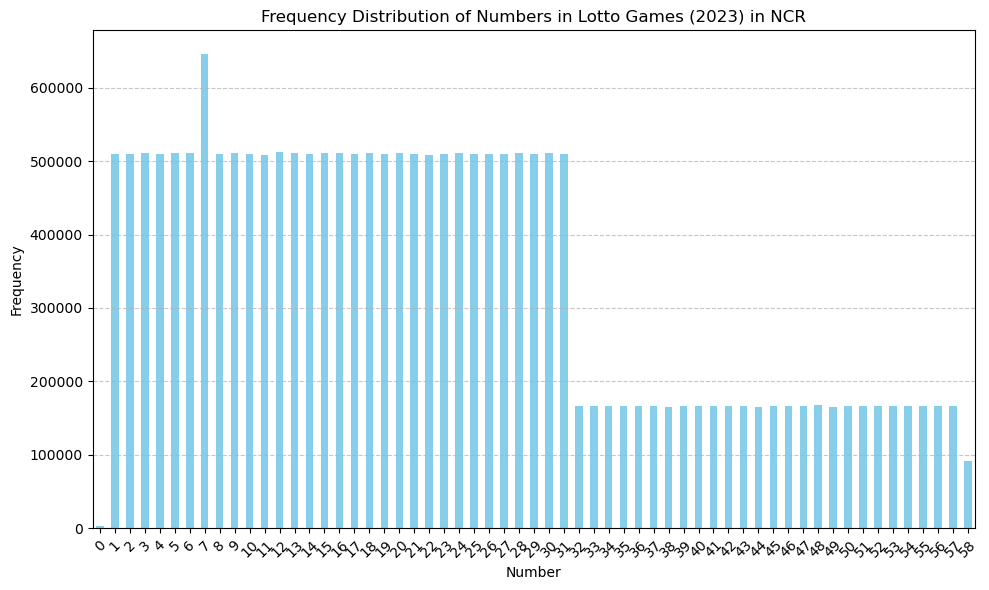

Summary Statistics of Frequency Distribution:
count        59.000000
mean     345315.762712
std      181969.220545
min        3400.000000
25%      166384.000000
50%      508871.000000
75%      510195.000000
max      645739.000000
Name: count, dtype: float64


In [19]:
# Convert date column to datetime
lotto_draw_results['date'] = pd.to_datetime(lotto_draw_results['date'])
all_ncr['date'] = pd.to_datetime(all_ncr['date'])

# Filter data for January 2023 to December 2023
lotto_draw_results_2023 = lotto_draw_results[(lotto_draw_results['date'] >= '2023-01-01') & (lotto_draw_results['date'] <= '2023-12-31')]
all_ncr_2023 = all_ncr[(all_ncr['date'] >= '2023-01-01') & (all_ncr['date'] <= '2023-12-31')]

# Calculate frequency of each number in the all_ncr dataset for 2023
all_ncr_numbers = all_ncr_2023[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']].values.flatten()
number_counts = pd.Series(all_ncr_numbers).value_counts().sort_index()

# Visualize frequency distribution
plt.figure(figsize=(10, 6))
number_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Numbers in Lotto Games (2023) in NCR')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Frequency Distribution of Numbers in Lotto Games (2023) in NCR.png')
plt.show()

# Summary statistics
print("Summary Statistics of Frequency Distribution:")
print(number_counts.describe())
# Explore correlations with historical winning numbers
# For example, you could calculate correlation between the frequency of each number in all_ncr
# and the occurrence of those numbers in lotto_draw_results dataset.
# This could be done using methods like Pearson correlation coefficient.


In [20]:
# Store the counts of numbers to a CSV file
number_counts.to_csv('number_counts_2023.csv', header=['count'])

In [21]:
number_counts = pd.read_csv('number_counts_2023.csv')

# Rename the column
number_counts = number_counts.rename(columns={'Unnamed: 0': 'numbers'})

# Store the counts of numbers to a CSV file
number_counts.to_csv('number_counts_2023.csv', index=False)

# Read the CSV file again
number_counts = pd.read_csv('number_counts_2023.csv')

# Rename the column
number_counts = number_counts.rename(columns={'Unnamed: 0': 'numbers'})

# Print the DataFrame
print(number_counts.head())


   numbers   count
0        0    3400
1        1  509393
2        2  509640
3        3  510405
4        4  509920


In [22]:
# Sort the DataFrame by the 'count' column in descending order
top_numbers = number_counts.sort_values(by='count', ascending=False)

# Select the top 6 numbers
top_six_numbers = top_numbers.head(6)

# Print the top 6 numbers
print(top_six_numbers)


    numbers   count
7         7  645739
12       12  511879
30       30  511499
20       20  511477
16       16  511477
9         9  511350


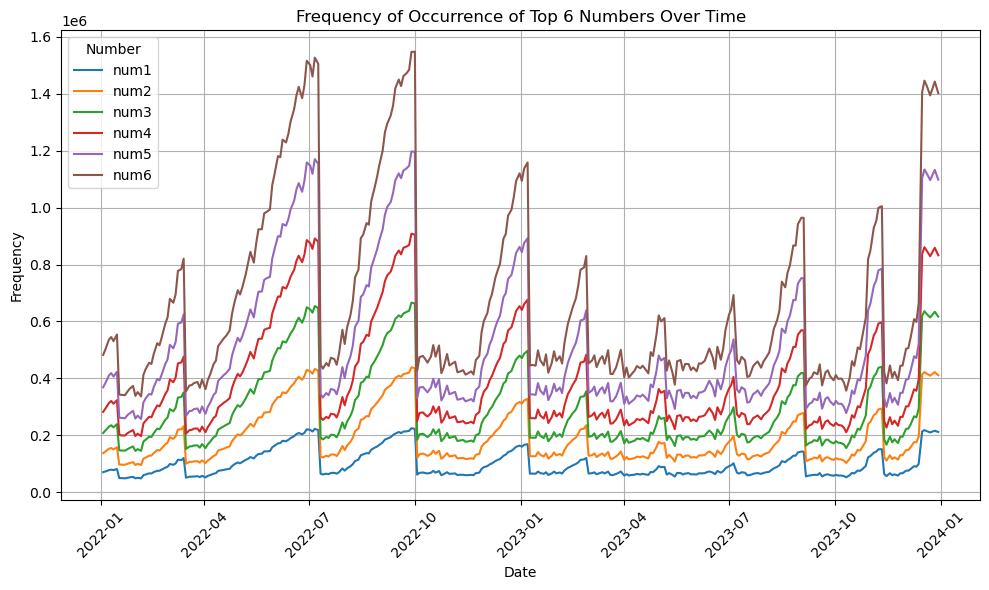

In [23]:
# Select the top 6 numbers
top_six_numbers = top_numbers.head(6)['numbers']

# Filter the dataset for the top 6 numbers
top_numbers_data = all_ncr[(all_ncr['num1'].isin(top_six_numbers)) |
                            (all_ncr['num2'].isin(top_six_numbers)) |
                            (all_ncr['num3'].isin(top_six_numbers)) |
                            (all_ncr['num4'].isin(top_six_numbers)) |
                            (all_ncr['num5'].isin(top_six_numbers)) |
                            (all_ncr['num6'].isin(top_six_numbers))]

# Group by date and number, then count occurrences
grouped_data = top_numbers_data.melt(id_vars=['date'], value_vars=['num1', 'num2', 'num3', 'num4', 'num5', 'num6'], var_name='number', value_name='count')
grouped_data = grouped_data.groupby(['date', 'number']).sum().reset_index()

# Pivot the data to have numbers as columns
pivot_data = grouped_data.pivot(index='date', columns='number', values='count').fillna(0)

# Plot the frequency of occurrence of each number over time
plt.figure(figsize=(10, 6))
for col in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[col], label=col)

plt.title('Frequency of Occurrence of Top 6 Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Number', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Frequency of Occurrence of Top 6 Numbers Over Time.png')
plt.show()

In [24]:
# Perform ADF test for each number
for col in pivot_data.columns:
    result = adfuller(pivot_data[col])
    print(f'ADF Test Results for number {col}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print('Is the time series stationary?', 'No' if result[1] > 0.05 else 'Yes')
    print('\n')


ADF Test Results for number num1:
ADF Statistic: -3.155701918996878
p-value: 0.02269632930279832
Critical Values:
   1%: -3.45176116018037
   5%: -2.870970093607691
   10%: -2.571794416006072
Is the time series stationary? Yes


ADF Test Results for number num2:
ADF Statistic: -3.164830112555947
p-value: 0.022112860804360406
Critical Values:
   1%: -3.45176116018037
   5%: -2.870970093607691
   10%: -2.571794416006072
Is the time series stationary? Yes


ADF Test Results for number num3:
ADF Statistic: -3.1722602082322093
p-value: 0.021647571011583502
Critical Values:
   1%: -3.45176116018037
   5%: -2.870970093607691
   10%: -2.571794416006072
Is the time series stationary? Yes


ADF Test Results for number num4:
ADF Statistic: -3.1887543840083423
p-value: 0.0206449174667712
Critical Values:
   1%: -3.45176116018037
   5%: -2.870970093607691
   10%: -2.571794416006072
Is the time series stationary? Yes


ADF Test Results for number num5:
ADF Statistic: -3.202755300319825
p-value: 0.01

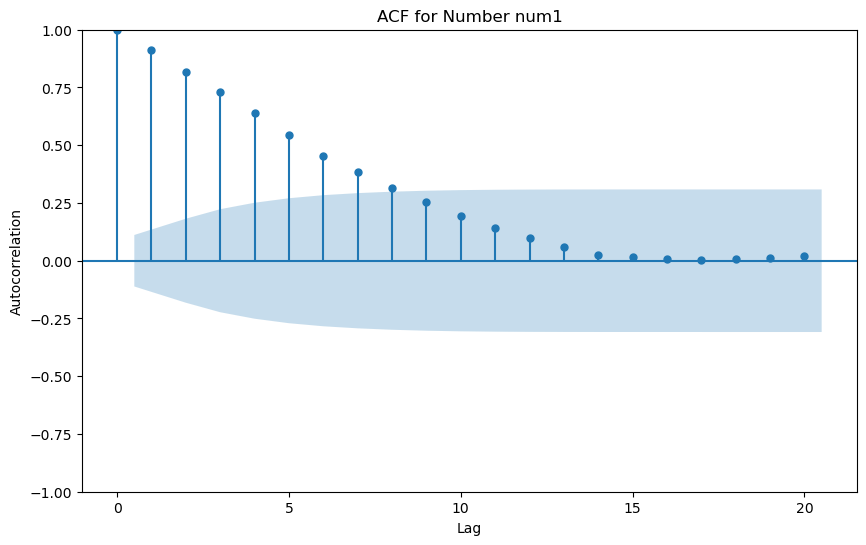

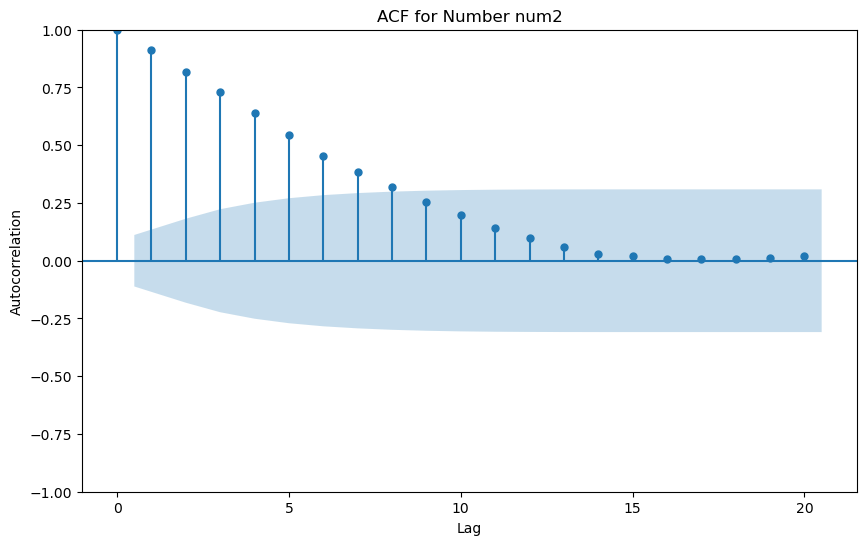

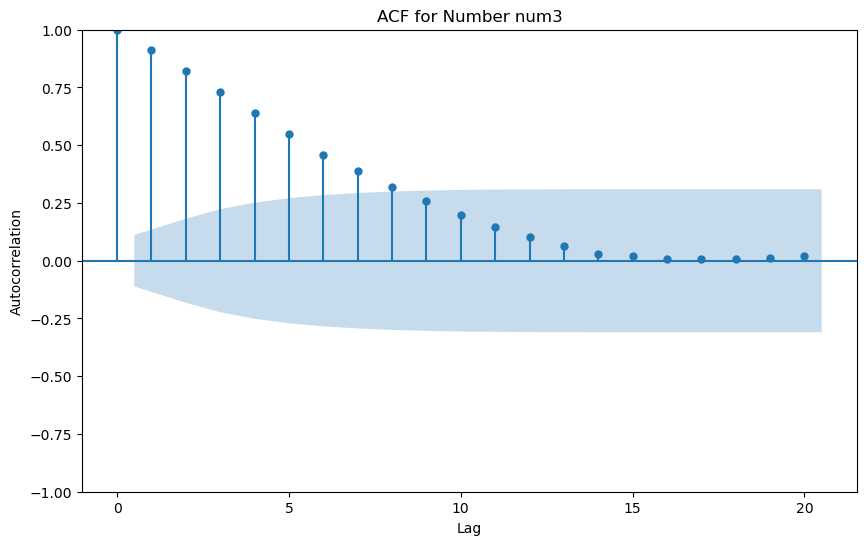

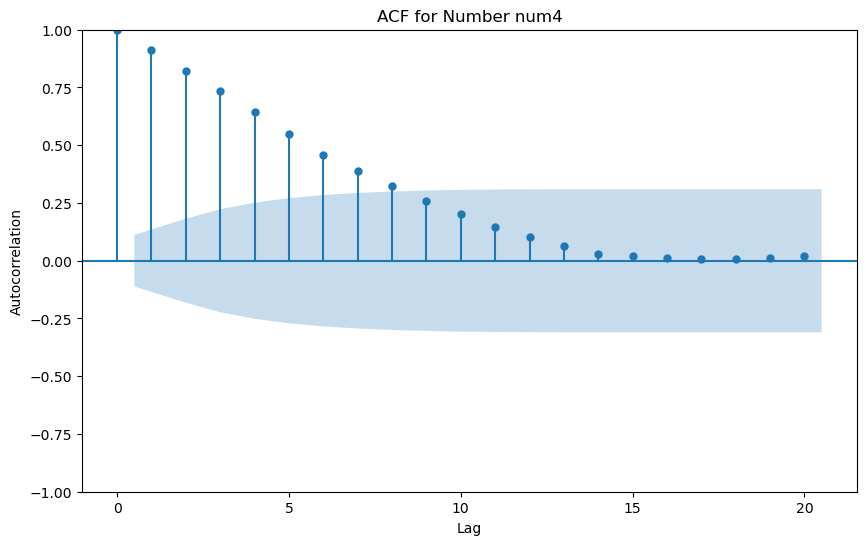

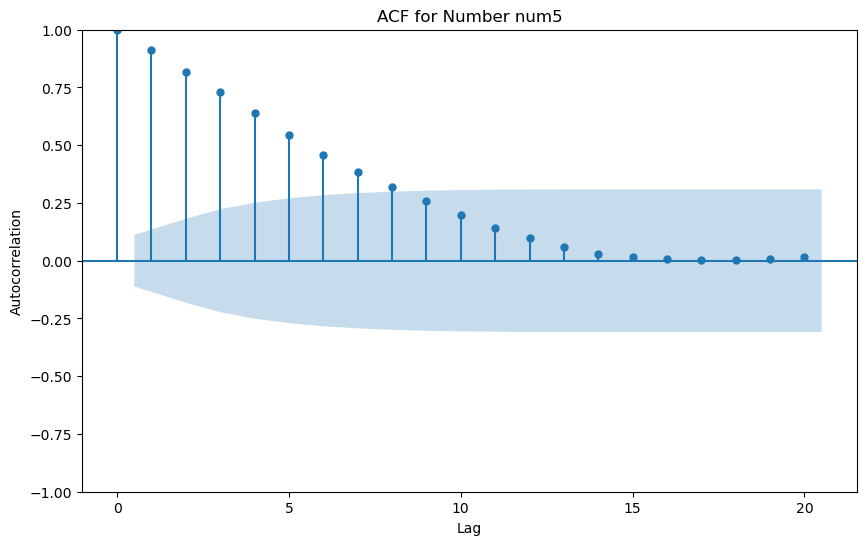

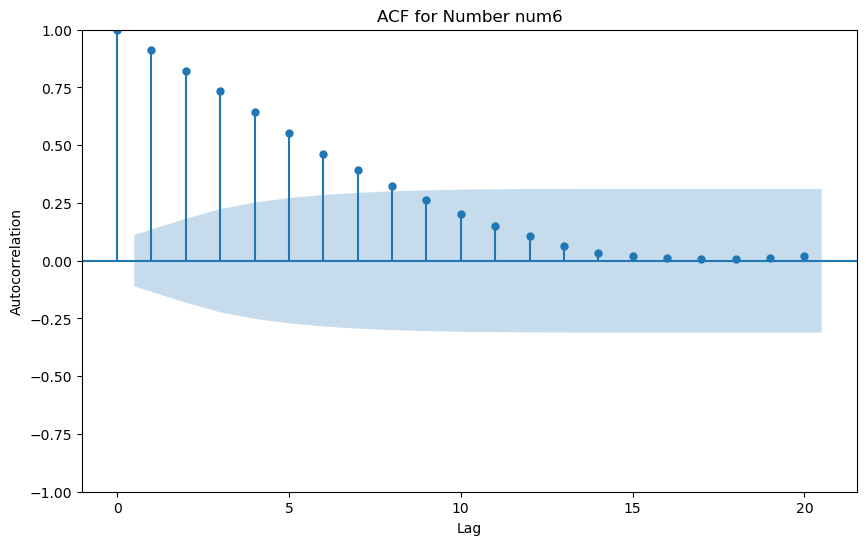

In [25]:
for col in pivot_data.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_acf(pivot_data[col], ax=ax, lags=20)
    ax.set_title(f'ACF for Number {col}')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelation')
    plt.savefig(f'ACF_for_Number_{col}.png')
    plt.show()


In [28]:
# Fit MA model for each number with lag 8
ma_models = {}
for col in pivot_data.columns:
    ma_model = ARIMA(pivot_data[col], order=(0, 0, 8))  # ARIMA(p, d, q) where q is the order of MA
    ma_result = ma_model.fit()
    ma_models[col] = ma_result

    # Print summary of the MA model
    print(f'MA Model Summary for Number {col}:')
    print(ma_result.summary())
    print('\n')


C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

MA Model Summary for Number num1:
                               SARIMAX Results                                
Dep. Variable:                   num1   No. Observations:                  309
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -3501.343
Date:                Sat, 16 Mar 2024   AIC                           7022.687
Time:                        21:10:37   BIC                           7060.020
Sample:                             0   HQIC                          7037.613
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.769e+04   1.96e+04      4.976      0.000    5.92e+04    1.36e+05
ma.L1          0.9977      0.122      8.199      0.000       0.759       1.236
ma.L2          0.9

C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

MA Model Summary for Number num3:
                               SARIMAX Results                                
Dep. Variable:                   num3   No. Observations:                  309
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -3834.732
Date:                Sat, 16 Mar 2024   AIC                           7689.463
Time:                        21:10:38   BIC                           7726.797
Sample:                             0   HQIC                          7704.389
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.86e+05   5.86e+04      4.883      0.000    1.71e+05    4.01e+05
ma.L1          0.9943      0.120      8.320      0.000       0.760       1.229
ma.L2          0.9

C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MA Model Summary for Number num5:
                               SARIMAX Results                                
Dep. Variable:                   num5   No. Observations:                  309
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -4014.593
Date:                Sat, 16 Mar 2024   AIC                           8049.185
Time:                        21:10:38   BIC                           8086.518
Sample:                             0   HQIC                          8064.111
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.111e+05   1.03e+05      4.943      0.000    3.08e+05    7.14e+05
ma.L1          0.9900      0.118      8.378      0.000       0.758       1.222
ma.L2          0.9

C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MA Model Summary for Number num6:
                               SARIMAX Results                                
Dep. Variable:                   num6   No. Observations:                  309
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -4095.274
Date:                Sat, 16 Mar 2024   AIC                           8210.548
Time:                        21:10:38   BIC                           8247.881
Sample:                             0   HQIC                          8225.474
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.626e+05   1.35e+05      4.917      0.000    3.99e+05    9.27e+05
ma.L1          0.9897      0.119      8.290      0.000       0.756       1.224
ma.L2          0.9

In [30]:
# Fit SARIMAX model for each number with seasonal order (0, 0, 0, 0) and lag 8
sarimax_models = {}
for col in pivot_data.columns:
    sarimax_model = SARIMAX(pivot_data[col], order=(0, 0, 8), seasonal_order=(0, 0, 0, 0))  # SARIMAX(p, d, q)(P, D, Q, s)
    sarimax_result = sarimax_model.fit()
    sarimax_models[col] = sarimax_result

    # Print summary of the SARIMAX model
    print(f'SARIMAX Model Summary for Number {col}:')
    print(sarimax_result.summary())
    print('\n')


C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX Model Summary for Number num1:
                               SARIMAX Results                                
Dep. Variable:                   num1   No. Observations:                  309
Model:               SARIMAX(0, 0, 8)   Log Likelihood               -3855.161
Date:                Sat, 16 Mar 2024   AIC                           7728.322
Time:                        21:10:46   BIC                           7761.922
Sample:                             0   HQIC                          7741.756
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2245      0.629      1.945      0.052      -0.009       2.458
ma.L2          1.2970      1.164      1.114      0.265      -0.985       3.579
ma.L3        

C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX Model Summary for Number num3:
                               SARIMAX Results                                
Dep. Variable:                   num3   No. Observations:                  309
Model:               SARIMAX(0, 0, 8)   Log Likelihood               -4187.124
Date:                Sat, 16 Mar 2024   AIC                           8392.249
Time:                        21:10:46   BIC                           8425.849
Sample:                             0   HQIC                          8405.682
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2209      0.619      1.972      0.049       0.007       2.434
ma.L2          1.2951      1.151      1.125      0.261      -0.961       3.552
ma.L3        

C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\carlm\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMAX Model Summary for Number num5:
                               SARIMAX Results                                
Dep. Variable:                   num5   No. Observations:                  309
Model:               SARIMAX(0, 0, 8)   Log Likelihood               -4366.555
Date:                Sat, 16 Mar 2024   AIC                           8751.109
Time:                        21:10:47   BIC                           8784.709
Sample:                             0   HQIC                          8764.542
                                - 309                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2167      0.616      1.976      0.048       0.010       2.423
ma.L2          1.2903      1.144      1.128      0.259      -0.952       3.532
ma.L3        

NameError: name 'number' is not defined

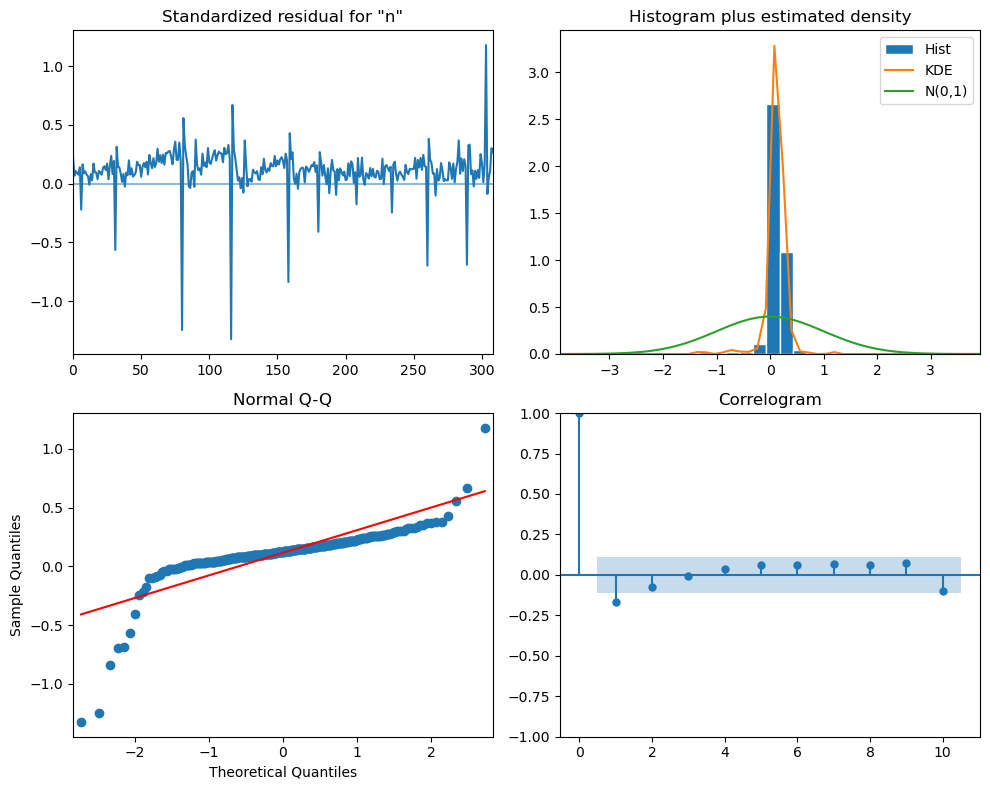

In [31]:
# Iterate over each model fit
for model_fit in sarimax_models.values():  # Assuming sarimax_models contains SARIMAX model fits
    # Plot diagnostics for each model fit
    model_fit.plot_diagnostics(figsize=(10, 8))
    plt.tight_layout()
    plt.savefig(f"Diagnostics_for_Number_{number}.png")
    plt.show()


In [79]:

# Iterate over each SARIMAX model fit
for col, sarimax_result in sarimax_models.items():
    # Get the residuals from the SARIMAX model fit
    residuals = sarimax_result.resid
    
    # Perform Ljung-Box test for autocorrelation
    lb_test_stat, p_values = acorr_ljungbox(residuals, lags=np.arange(1, 11, 1))
    
    # Print the Ljung-Box test statistics and p-values
    print(f"Ljung-Box Test Statistics for SARIMAX Model with number {col}:")
    for lag, lb_stat, p_value in zip(np.arange(1, 11, 1), lb_test_stat, p_values):
        print(f"Lag {lag}: Test Statistic = {lb_stat}, p-value = {p_value}")


Ljung-Box Test Statistics for SARIMAX Model with number num1:
Lag 1: Test Statistic = l, p-value = l
Lag 2: Test Statistic = b, p-value = b
Lag 3: Test Statistic = _, p-value = _
Lag 4: Test Statistic = s, p-value = p
Lag 5: Test Statistic = t, p-value = v
Lag 6: Test Statistic = a, p-value = a
Lag 7: Test Statistic = t, p-value = l
Ljung-Box Test Statistics for SARIMAX Model with number num2:
Lag 1: Test Statistic = l, p-value = l
Lag 2: Test Statistic = b, p-value = b
Lag 3: Test Statistic = _, p-value = _
Lag 4: Test Statistic = s, p-value = p
Lag 5: Test Statistic = t, p-value = v
Lag 6: Test Statistic = a, p-value = a
Lag 7: Test Statistic = t, p-value = l
Ljung-Box Test Statistics for SARIMAX Model with number num3:
Lag 1: Test Statistic = l, p-value = l
Lag 2: Test Statistic = b, p-value = b
Lag 3: Test Statistic = _, p-value = _
Lag 4: Test Statistic = s, p-value = p
Lag 5: Test Statistic = t, p-value = v
Lag 6: Test Statistic = a, p-value = a
Lag 7: Test Statistic = t, p-value

<a name="conc"></a>
## Conclusion and Recommendations
***

In conclusion, the SARIMAX models for num1 and num2 which are in the top 6 numbers show reasonably good fit based on the AIC values. However, the significant autocorrelation of residuals and non-normality suggest potential areas for model improvement. Further diagnostics and model refinement may be necessary to enhance the models' predictive performance.

[ref]: #top
[Back to Table of Contents][ref]